# Continuing... 6.1.4 Generate Random Latitudes and Longitudes
#### (This notebook is created near bottom of lesson page....)

### Create Latitude and Longitude Combinations:

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-43.3883441480325, -159.80642295465677),
 (-36.143256125677, 102.39510439835703),
 (66.23796521572169, -149.57104711062416),
 (-17.88186838609954, -122.5552909989402),
 (-54.808255717659335, -17.311628029685124),
 (-78.0802184842596, -122.85940335969444),
 (-54.143951579243485, 43.86190107363089),
 (82.03391495740723, 36.820662210447836),
 (-33.06199912386417, -155.42913168704246),
 (-58.527722684954625, 129.0466169568778),
 (-25.25641882028158, 79.77359907525181),
 (-6.974153739707248, -26.898356427766487),
 (7.835924606224836, -162.784682015342),
 (69.44024418977804, 23.361176888395164),
 (19.75758961361933, -23.91527434996891),
 (-32.915432827515254, 94.74997199524887),
 (-84.17857017105909, 155.4788992093869),
 (-36.333166397639765, 171.86113458395062),
 (84.95913492455264, -177.40085546532598),
 (-10.894032788324225, -139.26080842710763),
 (-60.64757185182822, 113.24605284896052),
 (72.46269277675361, 10.023455015234674),
 (21.30532867126847, -83.01039950232794),
 (-74.527532880

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

# 6.2.6 Get the City Weather Data

### Import Dependencies, and Initialize an Empty List and Counters &
### Loop through the list of cities and build the city url &
### Handle API request errors with try-except blocks:

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=776679839de3e268fa527f9a6dcc6c40


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | vardo
Processing Record 8 of Set 1 | avera
Processing Record 9 of Set 1 | portland
Processing Record 10 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 11 of Set 1 | pitimbu
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | kautokeino
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | geraldton
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | ahipara
Processing Record 18 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | sorland
Processing Record 22 

Processing Record 39 of Set 4 | paamiut
Processing Record 40 of Set 4 | chiang khong
Processing Record 41 of Set 4 | dikson
Processing Record 42 of Set 4 | asau
Processing Record 43 of Set 4 | juifang
City not found. Skipping...
Processing Record 44 of Set 4 | carutapera
Processing Record 45 of Set 4 | roald
Processing Record 46 of Set 4 | yarada
Processing Record 47 of Set 4 | bonthe
Processing Record 48 of Set 4 | amapa
Processing Record 49 of Set 4 | waipawa
Processing Record 50 of Set 4 | manono
Processing Record 1 of Set 5 | anadyr
Processing Record 2 of Set 5 | necochea
Processing Record 3 of Set 5 | la paz
Processing Record 4 of Set 5 | saleaula
City not found. Skipping...
Processing Record 5 of Set 5 | zanjan
Processing Record 6 of Set 5 | chapais
Processing Record 7 of Set 5 | saint-joseph
Processing Record 8 of Set 5 | jalu
Processing Record 9 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 5 | cidreira
Processing Record 11 of Set 5 | lompoc
Pro

City not found. Skipping...
Processing Record 31 of Set 8 | aanekoski
Processing Record 32 of Set 8 | tazovskiy
Processing Record 33 of Set 8 | karaton
Processing Record 34 of Set 8 | marcona
City not found. Skipping...
Processing Record 35 of Set 8 | ahumada
City not found. Skipping...
Processing Record 36 of Set 8 | sangar
Processing Record 37 of Set 8 | honiara
Processing Record 38 of Set 8 | abha
Processing Record 39 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 40 of Set 8 | tongliao
Processing Record 41 of Set 8 | namatanai
Processing Record 42 of Set 8 | novo aripuana
Processing Record 43 of Set 8 | sultanpur
Processing Record 44 of Set 8 | port hardy
Processing Record 45 of Set 8 | tarancon
Processing Record 46 of Set 8 | alta floresta
Processing Record 47 of Set 8 | atkarsk
Processing Record 48 of Set 8 | am timan
Processing Record 49 of Set 8 | satitoa
City not found. Skipping...
Processing Record 50 of Set 8 | upernavik
Processing Record 1 of Set 9 | ata

Processing Record 17 of Set 12 | tashtagol
Processing Record 18 of Set 12 | amlame
Processing Record 19 of Set 12 | polis
Processing Record 20 of Set 12 | santa eulalia del rio
City not found. Skipping...
Processing Record 21 of Set 12 | port-gentil
Processing Record 22 of Set 12 | gold coast
Processing Record 23 of Set 12 | margate
Processing Record 24 of Set 12 | omboue
Processing Record 25 of Set 12 | mrirt
City not found. Skipping...
Processing Record 26 of Set 12 | sao domingos
Processing Record 27 of Set 12 | renala khurd
Processing Record 28 of Set 12 | marv dasht
City not found. Skipping...
Processing Record 29 of Set 12 | miranorte
City not found. Skipping...
Processing Record 30 of Set 12 | buchanan
Processing Record 31 of Set 12 | henties bay
Processing Record 32 of Set 12 | camana
Processing Record 33 of Set 12 | canmore
Processing Record 34 of Set 12 | siilinjarvi
Processing Record 35 of Set 12 | itarema
Processing Record 36 of Set 12 | chara
Processing Record 37 of Set 12

# 6.2.7 Create a DataFrame of City Weather Data

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.21,-159.78,71.60,56,63,5.82,CK,2020-10-15 05:19:42
1,Busselton,-33.65,115.33,64.00,64,5,3.00,AU,2020-10-15 05:19:42
2,College,64.86,-147.80,24.80,68,90,4.70,US,2020-10-15 05:16:22
3,Rikitea,-23.12,-134.97,74.01,79,78,17.20,PF,2020-10-15 05:19:43
4,Arraial Do Cabo,-22.97,-42.03,72.19,90,17,18.12,BR,2020-10-15 05:19:43
5,East London,-33.02,27.91,59.00,82,0,3.36,ZA,2020-10-15 05:18:50
6,Vardo,70.37,31.11,39.20,93,40,17.22,NO,2020-10-15 05:19:43
7,Avera,33.19,-82.53,68.00,79,75,4.70,US,2020-10-15 05:19:43
8,Portland,45.52,-122.68,52.00,71,1,5.95,US,2020-10-15 05:16:16
9,Pitimbu,-7.47,-34.81,73.40,94,20,4.70,BR,2020-10-15 05:19:43


In [10]:
#Now reorder the columns as:  City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(14)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2020-10-15 05:19:42,-21.21,-159.78,71.60,56,63,5.82
1,Busselton,AU,2020-10-15 05:19:42,-33.65,115.33,64.00,64,5,3.00
2,College,US,2020-10-15 05:16:22,64.86,-147.80,24.80,68,90,4.70
3,Rikitea,PF,2020-10-15 05:19:43,-23.12,-134.97,74.01,79,78,17.20
4,Arraial Do Cabo,BR,2020-10-15 05:19:43,-22.97,-42.03,72.19,90,17,18.12
5,East London,ZA,2020-10-15 05:18:50,-33.02,27.91,59.00,82,0,3.36
6,Vardo,NO,2020-10-15 05:19:43,70.37,31.11,39.20,93,40,17.22
7,Avera,US,2020-10-15 05:19:43,33.19,-82.53,68.00,79,75,4.70
8,Portland,US,2020-10-15 05:16:16,45.52,-122.68,52.00,71,1,5.95
9,Pitimbu,BR,2020-10-15 05:19:43,-7.47,-34.81,73.40,94,20,4.70


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude vs Temperature

### Get Data for Plotting

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
import time

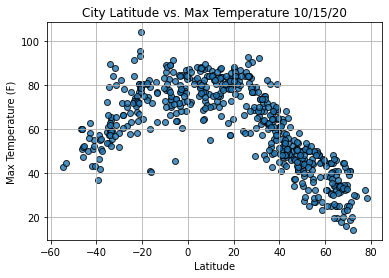

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs Humidity

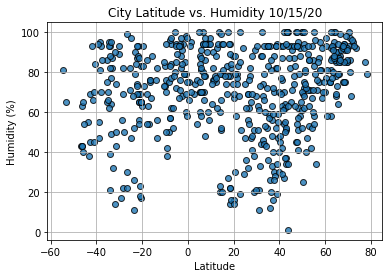

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


# 6.3.3 Plot Latitude vs Cloudiness

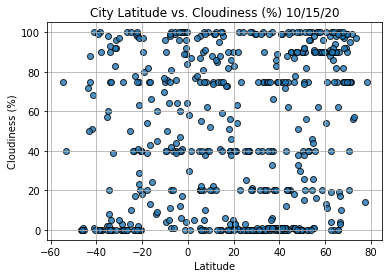

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs Wind Speed

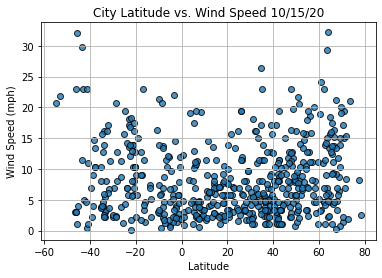

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

### Create a Linear Regression Function

In [18]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [51]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    print(r_value)
    plt.show()

### Create the Hemisphere DataFrames

In [52]:
index13 = city_data_df.loc[13]
index13

City                    Geraldton
Country                        AU
Date          2020-10-15 05:19:43
Lat                        -28.77
Lng                         114.6
Max Temp                     71.6
Humidity                       56
Cloudiness                      3
Wind Speed                   20.8
Name: 13, dtype: object

In [53]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
549     True
550     True
551     True
552     True
553     True
Name: Lat, Length: 554, dtype: bool

In [54]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,College,US,2020-10-15 05:16:22,64.86,-147.80,24.8,68,90,4.70
6,Vardo,NO,2020-10-15 05:19:43,70.37,31.11,39.2,93,40,17.22
7,Avera,US,2020-10-15 05:19:43,33.19,-82.53,68.0,79,75,4.70
8,Portland,US,2020-10-15 05:16:16,45.52,-122.68,52.0,71,1,5.95
10,Hilo,US,2020-10-15 05:16:31,19.73,-155.09,80.6,74,90,5.82


In [55]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

-0.8881684026672159


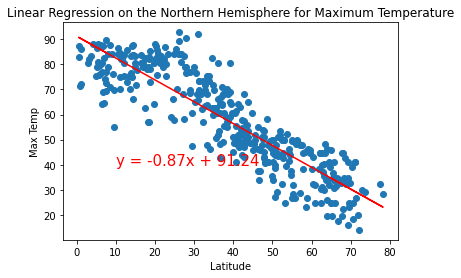

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(10,40))

### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

0.6004118605470474


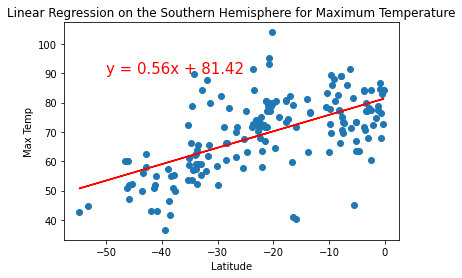

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-50,90))

# 6.4.3 Find the Correlation Between Latitude and Percent Humidity

0.17702553368489227


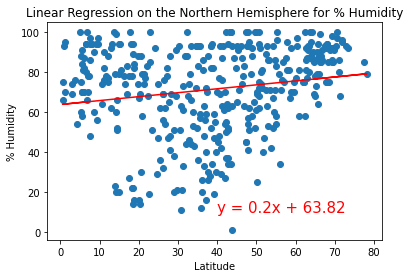

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

0.25765111432795873


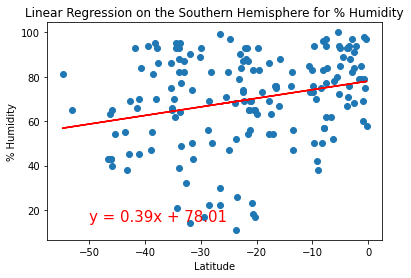

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,15))

# 6.4.4 Find the Correlation Between Latitudes and Percent Cloudiness

### Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

0.21649741864068292


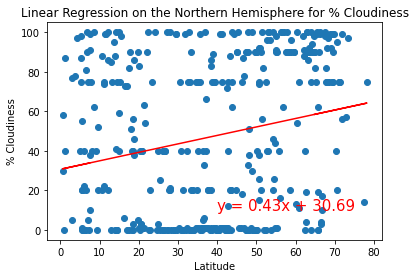

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

0.2569587114541732


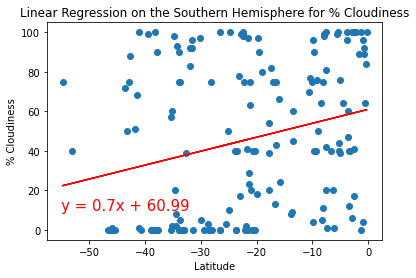

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-55,10))

# 6.4.5 Find the Correlation Between Latitude and Wind Speed

### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

0.2650328537214338


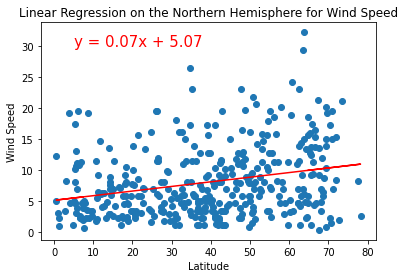

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(5,30))

### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

-0.23311279541343485


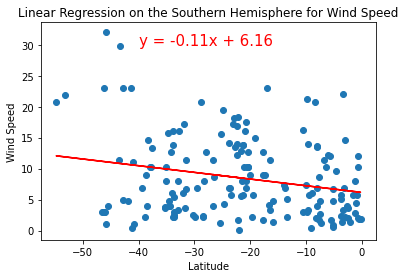

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-40,30))